Danielle Paes Barretto de Arruda Camara

**Version: 30/07/19 (last review)**

This notebook provides the statistical descriptive analysis of category pop used to build playlists for the user experiment.

This is a important step towards the choice of parameters used in building the playlists.


**Inputs:**

"tracks_audio_features_playlists_category_pop_2019-05-13.csv": csv file with audio features information.

"df_diff_category_pop_2019-06-05.csv":  csv file with absolute difference of audio features between two consecutive tracks.

"snippets_address_pop_2019-06-13.csv": csv file with snippets addresses available for the tracks.

**Outputs:**

"audio_tracks_cleaned_pop_"+TodaysDate+".csv": csv file with audio features info after removing duplicates.

"audio_tracks_diff_ALL_cleaned_pop_"+TodaysDate+".csv": csv file with absolute difference audio features of 2 consecutive tracks info after cleaning and renaming features.

"audio_tracks_diff_in_playlists_cleaned_pop_"+TodaysDate+".csv": csv file with subset of "audio_tracks_diff_ALL_cleaned_pop_"+TodaysDate+".csv" of only 2-track sequences that occurs in the category.

These outputs are used in the next notebooks in order to save processing time.

# Importing libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time
TodaysDate = time.strftime("%Y-%m-%d")


# Folders and Files

In [2]:
# to retrieve new data

tracks_folder = "./data/PREVIOUS_DATA/tracks_playlists_category_concatenated/"

tracks_diff_folder = "./data/PREVIOUS_DATA/diff_tracks_050619/"

snippets_address_folder = "./data/snippets_address/"

images_folder = "./data/img/"

# to save processed data to be used in the creation of the playlists

creating_playlist_folder = "./data/creating_playlist/"

In [3]:
# csv file with audio features information

tracks_file = "tracks_audio_features_playlists_category_pop_2019-05-13.csv"

# csv file with absolute difference of audio features between two consecutive tracks
tracks_diff_file = "df_diff_category_pop_2019-06-05.csv"

# csv file with absolute difference of audio features between two consecutive tracks
snippets_pop = "snippets_address_pop_2019-06-13.csv"

category = tracks_file.split('.')[0].split('_')[-2]
category

'pop'

# Functions

In [4]:
def plot_dist_categories_features(category_id, category_id_df, images_folder):
    """ Plot distribution of audio features or absolute difference of audio features, depending 
    of the dataframe used as input
    
    input:
        category_id: name of the category
        category_id_df: dataframe with audio features or absolute difference of audio features
        images_folder: folder to save the image generated (uncomment line at the end of the function to save)
        
    output:
        density plots of audio features audio features of 2-track sequence
        """
    
    fig, axs = plt.subplots(3, 5, figsize = (15,8))
    fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title
    
    fig.suptitle("Density plots for audio features of tracks for category "+ category_id)
    
    

    sns.kdeplot(category_id_df['acousticness'],shade=True,legend=False,ax=axs[0,0])
    axs[0,0].set_title('acousticness')
    
    sns.kdeplot(category_id_df['danceability'],shade=True,legend=False,ax=axs[0,1])
    axs[0,1].set_title('danceability')
    
    sns.kdeplot(category_id_df['energy'],shade=True,legend=False,ax=axs[0,2])
    axs[0,2].set_title('energy')
    
    sns.kdeplot(category_id_df['valence'],shade=True,legend=False,ax=axs[0,3])
    axs[0,3].set_title('valence')
    
    sns.kdeplot(category_id_df['tempo'],shade=True,legend=False,ax=axs[0,4])
    axs[0,4].set_title('tempo')

    sns.kdeplot(category_id_df['instrumentalness'],legend=False,shade=True,ax=axs[1,0])
    axs[1,0].set_title('instrumentalness')

    sns.kdeplot(category_id_df['key'],shade=True,legend=False,ax=axs[1,1])
    axs[1,1].set_title('key')
    
    sns.kdeplot(category_id_df['mode'],shade=True,legend=False,ax=axs[1,2])
    axs[1,2].set_title('mode')
    
    sns.kdeplot(category_id_df['liveness'],shade=True,legend=False,ax=axs[1,3])
    axs[1,3].set_title('liveness')
    
    sns.kdeplot(category_id_df['loudness'],shade=True,legend=False,ax=axs[1,4])
    axs[1,4].set_title('loudness')
    
    sns.kdeplot(category_id_df['speechiness'],shade=True,legend=False,ax=axs[2,0])
    axs[2,0].set_title('speechiness')

    # removing unnecessary subplots
    
    axs[2,1].set_axis_off()
    axs[2,2].set_axis_off()
    axs[2,3].set_axis_off()
    axs[2,4].set_axis_off()
        
    plt.show()

# saving image in a file

# Uncomment next live to save image in folder:
    
#     plt.savefig(images_folder + "density_plots_category_"+category_id+"_" + TodaysDate +".png")
    
    plt.close()

def frange(start, stop, step):
    """ to use range with decimal numbers"""

    i = start
    while i < stop:
        yield round(i,2)
        i += step

        
def plot_dist_categories_diff_features(category_id, category_id_df, images_folder):
    """ Plot distribution of audio features or absolute difference of audio features, depending 
    of the dataframe used as input
    
    input:
        category_id: name of the category
        category_id_df: dataframe with audio features or absolute difference of audio features
        images_folder: folder to save the image generated (uncomment line at the end of the function to save)
        
    output:
        density plots of the absolute difference of audio features of 2-track sequences
        """
    
    fig, axs = plt.subplots(3, 5, figsize = (15,8))
    fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title
    
    fig.suptitle("Density plots of absolute difference of audio features between 2 consecutive tracks for category "+ category_id)
    
    

    sns.kdeplot(category_id_df['diff_acousticness'],shade=True,legend=False,ax=axs[0,0])
    axs[0,0].set_title('diff_acousticness')
    
    sns.kdeplot(category_id_df['diff_danceability'],shade=True,legend=False,ax=axs[0,1])
    axs[0,1].set_title('diff_danceability')
    
    sns.kdeplot(category_id_df['diff_energy'],shade=True,legend=False,ax=axs[0,2])
    axs[0,2].set_title('diff_energy')
    
    sns.kdeplot(category_id_df['diff_valence'],shade=True,legend=False,ax=axs[0,3])
    axs[0,3].set_title('diff_valence')
    
    sns.kdeplot(category_id_df['diff_tempo'],shade=True,legend=False,ax=axs[0,4])
    axs[0,4].set_title('diff_tempo')

    sns.kdeplot(category_id_df['diff_instrumentalness'],legend=False,shade=True,ax=axs[1,0])
    axs[1,0].set_title('diff_instrumentalness')

    sns.kdeplot(category_id_df['diff_key'],shade=True,legend=False,ax=axs[1,1])
    axs[1,1].set_title('diff_key')
    
    sns.kdeplot(category_id_df['diff_mode'],shade=True,legend=False,ax=axs[1,2])
    axs[1,2].set_title('diff_mode')
    
    sns.kdeplot(category_id_df['diff_liveness'],shade=True,legend=False,ax=axs[1,3])
    axs[1,3].set_title('diff_liveness')
    
    sns.kdeplot(category_id_df['diff_loudness'],shade=True,legend=False,ax=axs[1,4])
    axs[1,4].set_title('diff_loudness')
    
    sns.kdeplot(category_id_df['diff_speechiness'],shade=True,legend=False,ax=axs[2,0])
    axs[2,0].set_title('diff_speechiness')

    # removing unnecessary subplots
    
    axs[2,1].set_axis_off()
    axs[2,2].set_axis_off()
    axs[2,3].set_axis_off()
    axs[2,4].set_axis_off()
        
    plt.show()

# saving image in a file

# Uncomment next live to save image in folder:
    
#     plt.savefig(images_folder + "density_plots_category_"+category_id+"_" + TodaysDate +".png")
    
    plt.close()


# Analysis of Audio tracks

In [5]:
df_tracks = pd.read_csv(tracks_folder+tracks_file)
df_tracks.head(3)

,category_id,album_name,artist_name,playlist_name,track_id,track_name,track_uri,duration_ms,track_popularity,acousticness,danceability,energy,valence,tempo,instrumentalness,key,mode,liveness,loudness,speechiness
0,pop,"thank u, next",Ariana Grande,Girls Only,2hloaUoRonYssMuqLCBLTX,bloodline,spotify:track:2hloaUoRonYssMuqLCBLTX,216893,91,0.08150,0.758,0.665,0.643,151.976,0.000157,2,0,0.216,-5.188,0.0774
1,pop,HIT-SIG,"Tabitha,Latifah",Girls Only,5wo3Opxvcc5SsszgmwV9Lh,Come My Way,spotify:track:5wo3Opxvcc5SsszgmwV9Lh,155702,57,0.26500,0.701,0.713,0.555,104.965,0.000000,0,0,0.169,-6.208,0.2870
2,pop,4,Beyoncé,Girls Only,1uXbwHHfgsXcUKfSZw5ZJ0,Run the World (Girls),spotify:track:1uXbwHHfgsXcUKfSZw5ZJ0,236093,77,0.00496,0.733,0.899,0.760,127.086,0.000047,0,1,0.372,-4.237,0.1430


In [6]:
df_tracks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 20 columns):
category_id         2467 non-null object
album_name          2467 non-null object
artist_name         2467 non-null object
playlist_name       2467 non-null object
track_id            2467 non-null object
track_name          2467 non-null object
track_uri           2467 non-null object
duration_ms         2467 non-null int64
track_popularity    2467 non-null int64
acousticness        2467 non-null float64
danceability        2467 non-null float64
energy              2467 non-null float64
valence             2467 non-null float64
tempo               2467 non-null float64
instrumentalness    2467 non-null float64
key                 2467 non-null int64
mode                2467 non-null int64
liveness            2467 non-null float64
loudness            2467 non-null float64
speechiness         2467 non-null float64
dtypes: float64(9), int64(4), object(7)
memory usage: 385.5+ KB


## Unique number of playlists and track_ids

In [7]:
# unique playlists

print("Number of unique playlists:", len(df_tracks.playlist_name.unique()))

# unique tracks

print("Number of unique track_id:", len(df_tracks.track_id.unique()))

Number of unique playlists: 42
Number of unique track_id: 2467


In [8]:
# remove repeated track_id

df_tracks.drop_duplicates(subset=['track_id'], keep='first', inplace=True)
df_tracks.reset_index(drop=True, inplace=True)
df_tracks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 20 columns):
category_id         2467 non-null object
album_name          2467 non-null object
artist_name         2467 non-null object
playlist_name       2467 non-null object
track_id            2467 non-null object
track_name          2467 non-null object
track_uri           2467 non-null object
duration_ms         2467 non-null int64
track_popularity    2467 non-null int64
acousticness        2467 non-null float64
danceability        2467 non-null float64
energy              2467 non-null float64
valence             2467 non-null float64
tempo               2467 non-null float64
instrumentalness    2467 non-null float64
key                 2467 non-null int64
mode                2467 non-null int64
liveness            2467 non-null float64
loudness            2467 non-null float64
speechiness         2467 non-null float64
dtypes: float64(9), int64(4), object(7)
memory usage: 385.5+ KB


## Saving cleaned dataframe in csv

In [9]:
# saving info about audio tracks after removing duplicates

df_tracks.to_csv(creating_playlist_folder+"audio_tracks_cleaned_"+category+"_"+TodaysDate+".csv",index=False)

In [10]:
# testing if it was saved properly

df_tracks = pd.read_csv(creating_playlist_folder+"audio_tracks_cleaned_"+category+"_"+TodaysDate+".csv")
df_tracks.head()

,category_id,album_name,artist_name,playlist_name,track_id,track_name,track_uri,duration_ms,track_popularity,acousticness,danceability,energy,valence,tempo,instrumentalness,key,mode,liveness,loudness,speechiness
0,pop,"thank u, next",Ariana Grande,Girls Only,2hloaUoRonYssMuqLCBLTX,bloodline,spotify:track:2hloaUoRonYssMuqLCBLTX,216893,91,0.08150,0.758,0.665,0.643,151.976,0.000157,2,0,0.216,-5.188,0.0774
1,pop,HIT-SIG,"Tabitha,Latifah",Girls Only,5wo3Opxvcc5SsszgmwV9Lh,Come My Way,spotify:track:5wo3Opxvcc5SsszgmwV9Lh,155702,57,0.26500,0.701,0.713,0.555,104.965,0.000000,0,0,0.169,-6.208,0.2870
2,pop,4,Beyoncé,Girls Only,1uXbwHHfgsXcUKfSZw5ZJ0,Run the World (Girls),spotify:track:1uXbwHHfgsXcUKfSZw5ZJ0,236093,77,0.00496,0.733,0.899,0.760,127.086,0.000047,0,1,0.372,-4.237,0.1430
3,pop,NAKAMURA,Aya Nakamura,Girls Only,7sKDftgGirHWTVFMtJoDoh,Djadja,spotify:track:7sKDftgGirHWTVFMtJoDoh,171133,77,0.06120,0.829,0.796,0.551,97.976,0.000000,5,1,0.111,-5.428,0.1100
4,pop,"thank u, next",Ariana Grande,Girls Only,3e9HZxeyfWwjeyPAMmWSSQ,"thank u, next",spotify:track:3e9HZxeyfWwjeyPAMmWSSQ,207320,91,0.22900,0.717,0.653,0.412,106.966,0.000000,1,1,0.101,-5.634,0.0658


## What are the top playlist in number of tracks?

In [11]:
df_tracks.groupby('playlist_name')['track_id'].count().sort_values(ascending=False).head(10)

playlist_name
Workday: Pop        195
Guilty Pleasures    151
Soft Pop Hits       150
Retro Pop           147
Love For Pop        100
Acoustic Hits        96
Troubadour           89
Liever Hollands      79
Beste van NL         75
Pop Rising           73
Name: track_id, dtype: int64

The first ones are candidate if we decide to make for a playlist and not a category.

## Statistics Audio Features

### Correlation heatmap

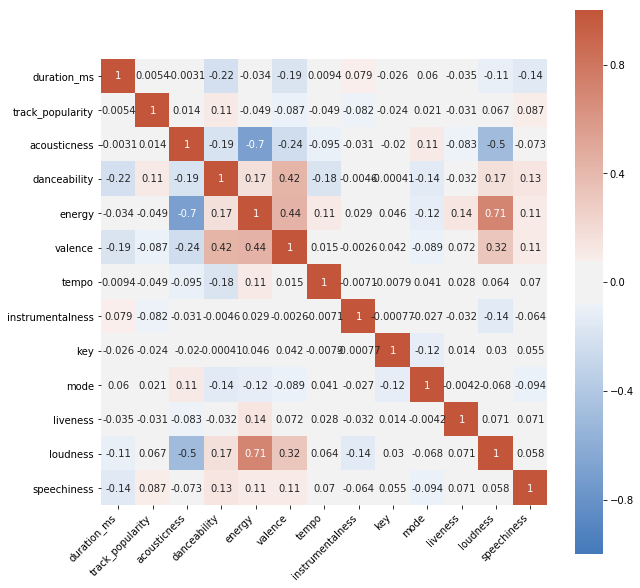

In [12]:
plt.figure(figsize=(10,10))
corr = df_tracks.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Descriptive Statistics

In [13]:
df_tracks.describe()

,duration_ms,track_popularity,acousticness,danceability,energy,valence,tempo,instrumentalness,key,mode,liveness,loudness,speechiness
count,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,207857.459668,53.713417,0.282246,0.631919,0.616420,0.501579,117.839342,0.018066,5.344143,0.627077,0.163841,-6.783626,0.077531
std,35949.461138,22.099553,0.276729,0.138869,0.194843,0.226454,27.863655,0.092878,3.637287,0.483680,0.122659,2.588275,0.073125
min,63080.000000,0.000000,0.000034,0.144000,0.056500,0.031500,48.702000,0.000000,0.000000,0.000000,0.020200,-19.895000,0.023100
25%,185646.000000,40.000000,0.051550,0.546000,0.483000,0.327500,97.508000,0.000000,2.000000,0.000000,0.093900,-8.073500,0.036150
50%,204786.000000,56.000000,0.178000,0.643000,0.642000,0.487000,113.815000,0.000000,6.000000,1.000000,0.119000,-6.311000,0.048800
75%,225320.000000,70.000000,0.456000,0.730500,0.765000,0.674000,133.341500,0.000106,8.000000,1.000000,0.183000,-5.014000,0.083650
max,508907.000000,100.000000,0.992000,0.969000,0.993000,0.972000,206.053000,0.918000,11.000000,1.000000,0.992000,-0.511000,0.514000


### Percentailes

In [14]:
percentailes = [idx for idx in frange(0.0,1,0.05)]

In [15]:
df_tracks[['energy','valence','tempo']].quantile(percentailes, axis = 0)

,energy,valence,tempo
0.00,0.0565,0.0315,48.7020
0.05,0.2523,0.1543,79.6783
0.10,0.3296,0.2016,85.9978
0.15,0.3939,0.2509,91.9037
0.20,0.4420,0.2882,94.9970
0.25,0.4830,0.3275,97.5080
0.30,0.5260,0.3570,99.9840
0.35,0.5590,0.3910,102.1507
0.40,0.5890,0.4270,105.0444
0.45,0.6140,0.4550,109.9372


### Boxplots Energy, Valence, and Tempo

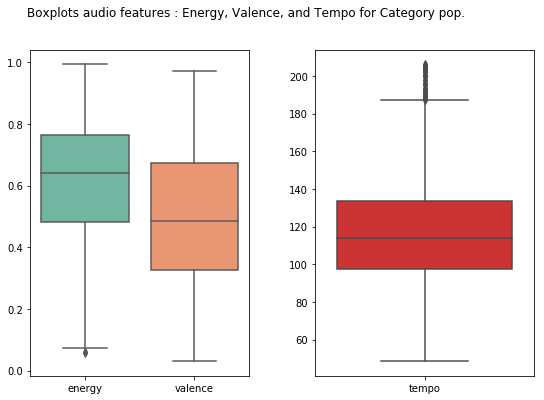

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (10,6))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)

fig.suptitle("Boxplots audio features : Energy, Valence, and Tempo for Category "+category+".")
    
sns.boxplot(data=df_tracks[['energy', 'valence']], orient="v", palette="Set2",ax = axs[0])    
sns.boxplot(data=df_tracks[['tempo']], orient="v", palette="Set1", ax = axs[1])    

### Outliers

In [17]:
from scipy.stats import iqr

iqr_tempo = iqr(df_tracks.tempo, axis=0)

out_tempo_up_tracks = df_tracks['tempo'].describe()['75%']+1.5*iqr_tempo
print("Tempo: outliers above", out_tempo_up_tracks)

out_tempo_down_tracks = df_tracks['tempo'].describe()['25%']-1.5*iqr_tempo
print("Tempo: outliers bellow", out_tempo_down_tracks)

Tempo: outliers above 187.09175
Tempo: outliers bellow 43.75775000000003


### Density Plots

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


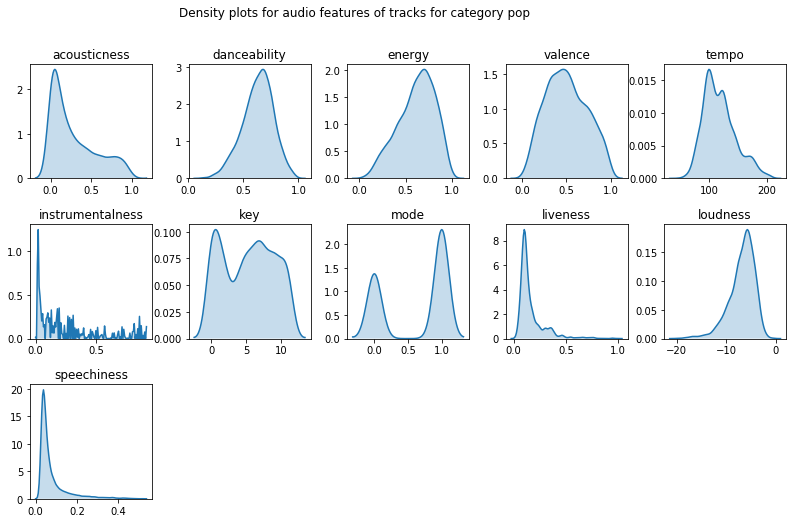

In [18]:
category_id = category
category_id_df = df_tracks
plot_dist_categories_features(category_id, category_id_df, images_folder)

### Pairplots

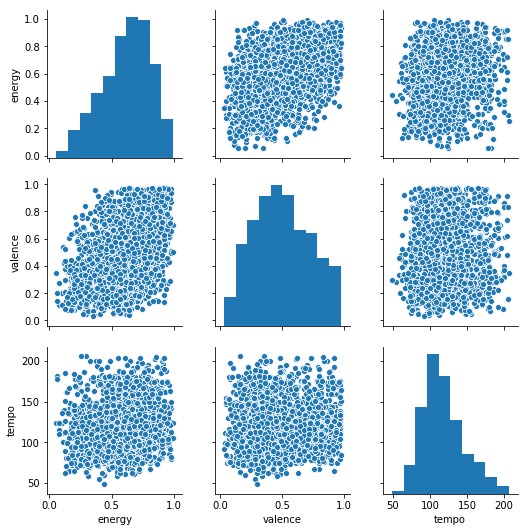

In [19]:
sns.pairplot(df_tracks[['energy','valence','tempo']])

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


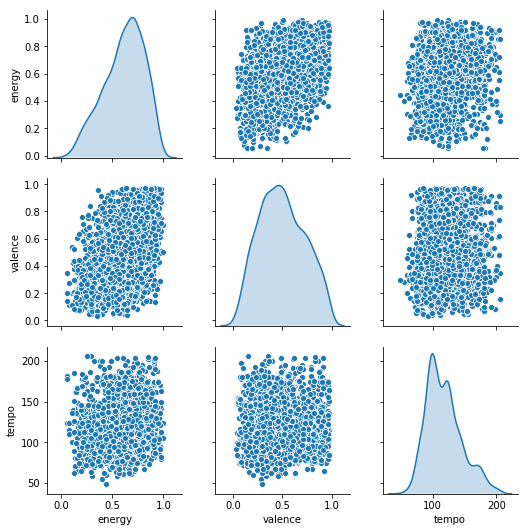

In [20]:
sns.pairplot(df_tracks[['energy','valence','tempo']], diag_kind='kde')

### Scatter plot Valence x Energy

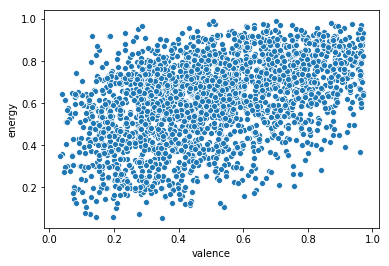

In [21]:
sns.scatterplot(df_tracks['valence'],df_tracks['energy'])

### Distribution Energy, Valence, and Tempo

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


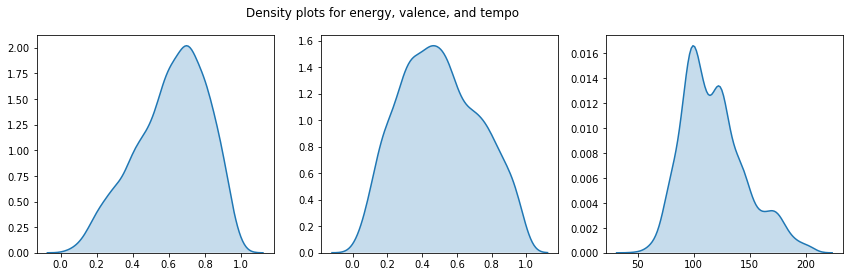

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.4)

# title   
fig.suptitle("Density plots for energy, valence, and tempo")

sns.kdeplot(df_tracks['energy'],shade=True,legend=False,ax=axs[0])
    
sns.kdeplot(df_tracks['valence'],shade=True,legend=False,ax=axs[1])

sns.kdeplot(df_tracks['tempo'],shade=True,legend=False,ax=axs[2])
    

# Analysis of Absolute Difference All possible 2-track sequence

In [23]:
# load the absolute difference audio features data

df_tracks_diff = pd.read_csv(tracks_diff_folder+tracks_diff_file)

In [24]:
df_tracks_diff.head()

,current_track-next_track,diff_acousticness,diff_danceability,diff_energy,diff_valence,diff_tempo,diff_instrumentalness,diff_key,diff_mode,diff_liveness,diff_loudness,diff_speechiness,is_good_sequence
0,2hloaUoRonYssMuqLCBLTX_5wo3Opxvcc5SsszgmwV9Lh,0.18350,0.057,0.048,0.088,47.011,0.000157,2.0,0.0,0.047,1.020,0.2096,1
1,5wo3Opxvcc5SsszgmwV9Lh_1uXbwHHfgsXcUKfSZw5ZJ0,0.26004,0.032,0.186,0.205,22.121,0.000047,0.0,1.0,0.203,1.971,0.1440,1
2,1uXbwHHfgsXcUKfSZw5ZJ0_7sKDftgGirHWTVFMtJoDoh,0.05624,0.096,0.103,0.209,29.110,0.000047,5.0,0.0,0.261,1.191,0.0330,1
3,7sKDftgGirHWTVFMtJoDoh_3e9HZxeyfWwjeyPAMmWSSQ,0.16780,0.112,0.143,0.139,8.990,0.000000,4.0,0.0,0.010,0.206,0.0442,1
4,3e9HZxeyfWwjeyPAMmWSSQ_44n97yHySt0Z9rqPaXgjCK,0.68400,0.204,0.403,0.061,32.863,0.000000,4.0,1.0,0.016,3.742,0.0291,1


In [25]:
df_tracks_diff.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083622 entries, 0 to 6083621
Data columns (total 13 columns):
current_track-next_track    6083622 non-null object
diff_acousticness           6083622 non-null float64
diff_danceability           6083622 non-null float64
diff_energy                 6083622 non-null float64
diff_valence                6083622 non-null float64
diff_tempo                  6083622 non-null float64
diff_instrumentalness       6083622 non-null float64
diff_key                    6083622 non-null float64
diff_mode                   6083622 non-null float64
diff_liveness               6083622 non-null float64
diff_loudness               6083622 non-null float64
diff_speechiness            6083622 non-null float64
is_good_sequence            6083622 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 603.4+ MB


## Some cleaning

In [26]:
# df_tracks_diff.rename(columns = {"Unnamed: 0":"current_track-next_track","label":"is_good_sequence"},inplace=True)

# df_tracks_diff.sort_values(by='is_good_sequence', ascending = False, inplace = True)

# df_tracks_diff.drop_duplicates(subset = ["current_track-next_track","is_good_sequence"], keep = 'first', inplace = True)

# df_tracks_diff.reset_index(inplace=True, drop = True)

In [27]:
# df_tracks_diff.head(3)

In [28]:
# df_tracks_diff.info(null_counts=True)

## Saving cleaned dataframe in csv

In [29]:
# saving information about absolute difference between audio tracks after some manipulation

df_tracks_diff.to_csv(creating_playlist_folder+"audio_tracks_diff_ALL_cleaned_"+category+"_"+TodaysDate+".csv",index=False)

In [30]:
# Testing new file

df_tracks_diff = pd.read_csv(creating_playlist_folder+"audio_tracks_diff_ALL_cleaned_"+category+"_"+TodaysDate+".csv")
df_tracks_diff.head()

,current_track-next_track,diff_acousticness,diff_danceability,diff_energy,diff_valence,diff_tempo,diff_instrumentalness,diff_key,diff_mode,diff_liveness,diff_loudness,diff_speechiness,is_good_sequence
0,2hloaUoRonYssMuqLCBLTX_5wo3Opxvcc5SsszgmwV9Lh,0.18350,0.057,0.048,0.088,47.011,0.000157,2.0,0.0,0.047,1.020,0.2096,1
1,5wo3Opxvcc5SsszgmwV9Lh_1uXbwHHfgsXcUKfSZw5ZJ0,0.26004,0.032,0.186,0.205,22.121,0.000047,0.0,1.0,0.203,1.971,0.1440,1
2,1uXbwHHfgsXcUKfSZw5ZJ0_7sKDftgGirHWTVFMtJoDoh,0.05624,0.096,0.103,0.209,29.110,0.000047,5.0,0.0,0.261,1.191,0.0330,1
3,7sKDftgGirHWTVFMtJoDoh_3e9HZxeyfWwjeyPAMmWSSQ,0.16780,0.112,0.143,0.139,8.990,0.000000,4.0,0.0,0.010,0.206,0.0442,1
4,3e9HZxeyfWwjeyPAMmWSSQ_44n97yHySt0Z9rqPaXgjCK,0.68400,0.204,0.403,0.061,32.863,0.000000,4.0,1.0,0.016,3.742,0.0291,1


## Statistics Absolute Difference Audio Features

### Correlation heatmap

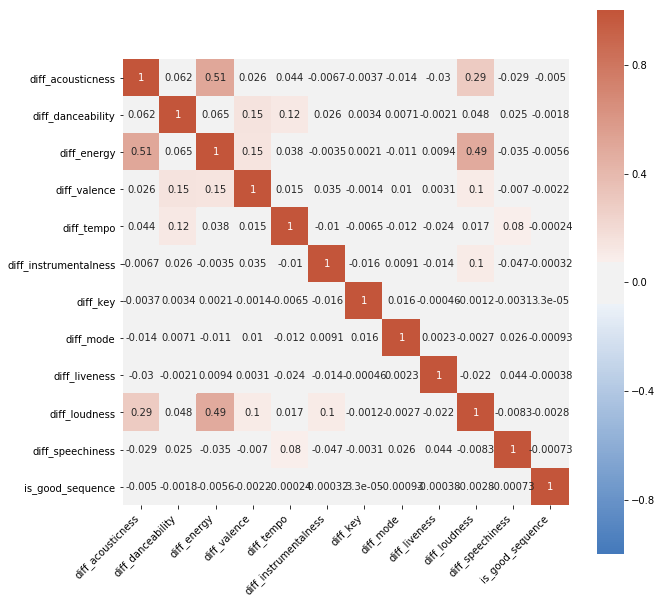

In [31]:
plt.figure(figsize=(10,10))
corr = df_tracks_diff.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Descriptive Statistics

In [32]:
df_tracks_diff.describe()

,diff_acousticness,diff_danceability,diff_energy,diff_valence,diff_tempo,diff_instrumentalness,diff_key,diff_mode,diff_liveness,diff_loudness,diff_speechiness,is_good_sequence
count,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06,6.083622e+06
mean,3.008416e-01,1.562101e-01,2.209575e-01,2.600304e-01,3.101601e+01,3.476899e-02,4.175597e+00,4.678923e-01,1.124465e-01,2.790424e+00,6.340866e-02,4.053506e-04
std,2.503048e-01,1.190273e-01,1.646359e-01,1.869409e-01,2.430584e+01,1.266645e-01,3.004015e+00,4.989681e-01,1.320844e-01,2.368938e+00,8.169389e-02,2.012924e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.590000e-02,6.200000e-02,8.800000e-02,1.060000e-01,1.188200e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.500000e-02,1.015000e+00,1.060000e-02,0.000000e+00
50%,2.331500e-01,1.310000e-01,1.870000e-01,2.260000e-01,2.530100e+01,3.990000e-05,4.000000e+00,0.000000e+00,6.160000e-02,2.190000e+00,2.940000e-02,0.000000e+00
75%,4.739000e-01,2.250000e-01,3.224000e-01,3.820000e-01,4.492200e+01,1.620000e-03,6.000000e+00,1.000000e+00,1.550000e-01,3.915000e+00,8.190000e-02,0.000000e+00
max,9.919657e-01,8.250000e-01,9.365000e-01,9.405000e-01,1.573510e+02,9.180000e-01,1.100000e+01,1.000000e+00,9.718000e-01,1.938400e+01,4.909000e-01,1.000000e+00


In [33]:
df_tracks_diff[['diff_energy','diff_valence','diff_tempo']].describe()

,diff_energy,diff_valence,diff_tempo
count,6.083622e+06,6.083622e+06,6.083622e+06
mean,2.209575e-01,2.600304e-01,3.101601e+01
std,1.646359e-01,1.869409e-01,2.430584e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.800000e-02,1.060000e-01,1.188200e+01
50%,1.870000e-01,2.260000e-01,2.530100e+01
75%,3.224000e-01,3.820000e-01,4.492200e+01
max,9.365000e-01,9.405000e-01,1.573510e+02


### Percentailes

In [34]:
percentailes = [idx for idx in frange(0.0,1,0.05)]

In [35]:
df_tracks_diff[['diff_energy','diff_valence','diff_tempo']].quantile(percentailes, axis = 0)

,diff_energy,diff_valence,diff_tempo
0.00,0.0000,0.000,0.000
0.05,0.0170,0.021,2.061
0.10,0.0340,0.042,4.489
0.15,0.0520,0.063,6.906
0.20,0.0700,0.085,9.146
0.25,0.0880,0.106,11.882
0.30,0.1060,0.129,14.214
0.35,0.1250,0.152,16.990
0.40,0.1450,0.175,19.895
0.45,0.1650,0.200,22.485


### Boxplots Energy, Valence, and Tempo

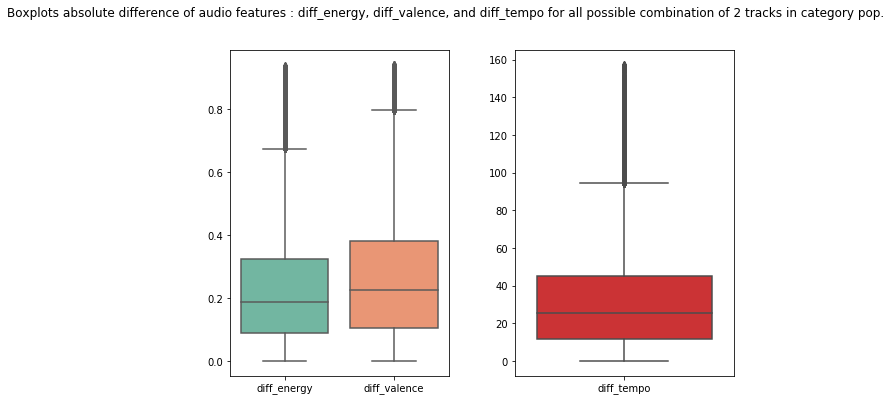

In [37]:
fig, axs = plt.subplots(1, 2, figsize = (10,6))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)

fig.suptitle("Boxplots absolute difference of audio features : diff_energy, diff_valence, and diff_tempo for all possible combination of 2 tracks in category pop.")
    
sns.boxplot(data=df_tracks_diff[['diff_energy', 'diff_valence']], orient="v", palette="Set2",ax = axs[0])    
sns.boxplot(data=df_tracks_diff[['diff_tempo']], orient="v", palette="Set1", ax = axs[1])    

### Outliers

In [38]:
from scipy.stats import iqr

iqr_energy = iqr(df_tracks_diff['diff_energy'], axis=0)

out_energy_tracks_diff = df_tracks_diff['diff_energy'].describe()['75%']+1.5*iqr_energy
print("Diff_energy: outliers above", out_energy_tracks_diff)

iqr_valence = iqr(df_tracks_diff['diff_valence'], axis=0)

out_valence_tracks_diff = df_tracks_diff['diff_valence'].describe()['75%']+1.5*iqr_valence
print("Diff_valence: outliers above", out_valence_tracks_diff)

iqr_tempo = iqr(df_tracks_diff['diff_tempo'], axis=0)
out_tempo_tracks_diff = df_tracks_diff['diff_tempo'].describe()['75%']+1.5*iqr_tempo
print("Diff_tempo: outliers above", out_tempo_tracks_diff)

Diff_energy: outliers above 0.6740000000000002
Diff_valence: outliers above 0.7959999999999998
Diff_tempo: outliers above 94.48200000000003


### Density Plots

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


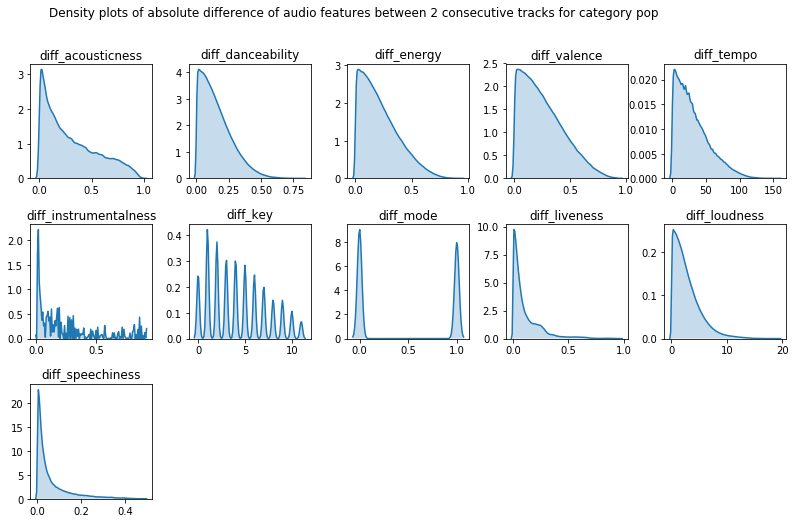

In [39]:
category_id = category
category_id_df = df_tracks_diff
plot_dist_categories_diff_features(category_id, category_id_df, images_folder)

### Pairplots

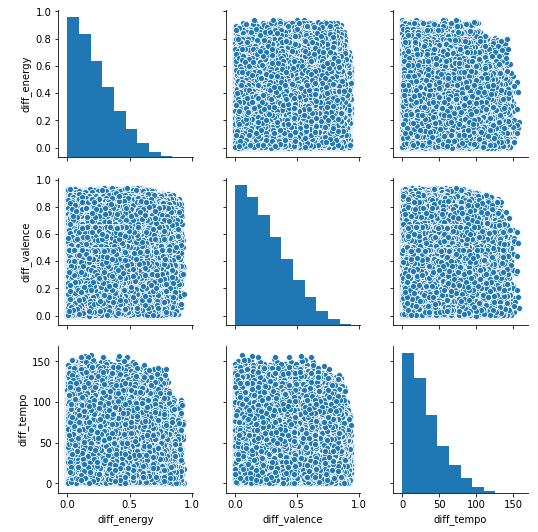

In [40]:
sns.pairplot(df_tracks_diff[['diff_energy','diff_valence','diff_tempo']])

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


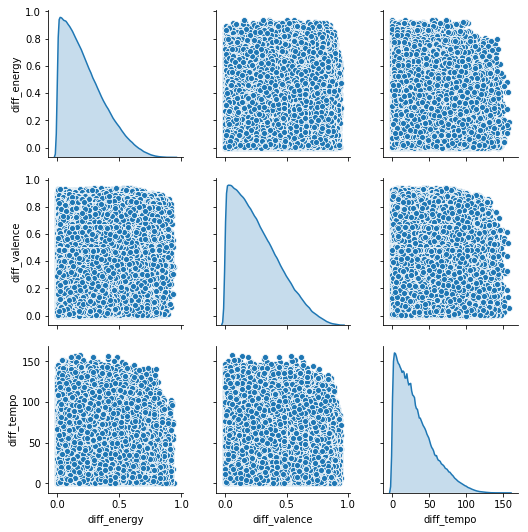

In [41]:
sns.pairplot(df_tracks_diff[['diff_energy','diff_valence','diff_tempo']], diag_kind='kde')

### Scatter plot Valence x Energy

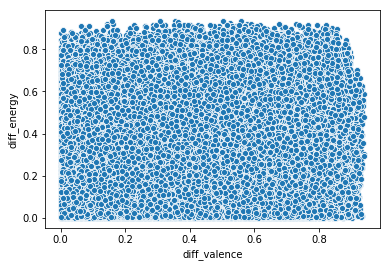

In [42]:
sns.scatterplot(df_tracks_diff['diff_valence'],df_tracks_diff['diff_energy'])

### Distribution Energy, Valence, and Tempo

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


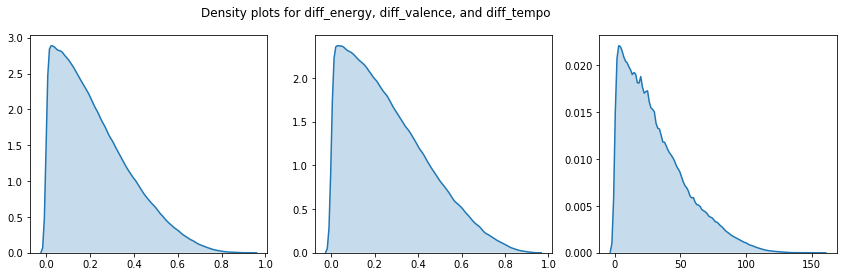

In [43]:
fig, axs = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.4)

# title   
fig.suptitle("Density plots for diff_energy, diff_valence, and diff_tempo")

sns.kdeplot(df_tracks_diff['diff_energy'],shade=True,legend=False,ax=axs[0])
    
sns.kdeplot(df_tracks_diff['diff_valence'],shade=True,legend=False,ax=axs[1])

sns.kdeplot(df_tracks_diff['diff_tempo'],shade=True,legend=False,ax=axs[2])
    

# Analysis of Absolute Difference of 2-track sequences that occurs in the category

In principle the analysis made in the previous section for all the possible 2-track sequence considering the audio tracks of the chosen category is important for comparison. However, when defining the parameters for filtering we want to be based in what is a typical 2-track sequence in a real-world playlist. Therefore, the choice of this parameters are based in the following analysis on 2-track sequences that indeed occurs in the category chosen.

In [44]:
# selecting the 2-track sequence that occurs in the category

df_diff_in_playlists = df_tracks_diff[df_tracks_diff.is_good_sequence==1]
df_diff_in_playlists.shape

(2466, 13)

In [45]:
df_diff_in_playlists.head()

,current_track-next_track,diff_acousticness,diff_danceability,diff_energy,diff_valence,diff_tempo,diff_instrumentalness,diff_key,diff_mode,diff_liveness,diff_loudness,diff_speechiness,is_good_sequence
0,2hloaUoRonYssMuqLCBLTX_5wo3Opxvcc5SsszgmwV9Lh,0.18350,0.057,0.048,0.088,47.011,0.000157,2.0,0.0,0.047,1.020,0.2096,1
1,5wo3Opxvcc5SsszgmwV9Lh_1uXbwHHfgsXcUKfSZw5ZJ0,0.26004,0.032,0.186,0.205,22.121,0.000047,0.0,1.0,0.203,1.971,0.1440,1
2,1uXbwHHfgsXcUKfSZw5ZJ0_7sKDftgGirHWTVFMtJoDoh,0.05624,0.096,0.103,0.209,29.110,0.000047,5.0,0.0,0.261,1.191,0.0330,1
3,7sKDftgGirHWTVFMtJoDoh_3e9HZxeyfWwjeyPAMmWSSQ,0.16780,0.112,0.143,0.139,8.990,0.000000,4.0,0.0,0.010,0.206,0.0442,1
4,3e9HZxeyfWwjeyPAMmWSSQ_44n97yHySt0Z9rqPaXgjCK,0.68400,0.204,0.403,0.061,32.863,0.000000,4.0,1.0,0.016,3.742,0.0291,1


## Saving cleaned dataframe in csv

In [46]:
df_diff_in_playlists.to_csv(creating_playlist_folder+"audio_tracks_diff_in_playlists_cleaned_"+category+"_"+TodaysDate+".csv",index=False)

In [47]:
# testing the file
df_diff_in_playlists = pd.read_csv(creating_playlist_folder+"audio_tracks_diff_in_playlists_cleaned_"+category+"_"+TodaysDate+".csv")
df_diff_in_playlists.head()

,current_track-next_track,diff_acousticness,diff_danceability,diff_energy,diff_valence,diff_tempo,diff_instrumentalness,diff_key,diff_mode,diff_liveness,diff_loudness,diff_speechiness,is_good_sequence
0,2hloaUoRonYssMuqLCBLTX_5wo3Opxvcc5SsszgmwV9Lh,0.18350,0.057,0.048,0.088,47.011,0.000157,2.0,0.0,0.047,1.020,0.2096,1
1,5wo3Opxvcc5SsszgmwV9Lh_1uXbwHHfgsXcUKfSZw5ZJ0,0.26004,0.032,0.186,0.205,22.121,0.000047,0.0,1.0,0.203,1.971,0.1440,1
2,1uXbwHHfgsXcUKfSZw5ZJ0_7sKDftgGirHWTVFMtJoDoh,0.05624,0.096,0.103,0.209,29.110,0.000047,5.0,0.0,0.261,1.191,0.0330,1
3,7sKDftgGirHWTVFMtJoDoh_3e9HZxeyfWwjeyPAMmWSSQ,0.16780,0.112,0.143,0.139,8.990,0.000000,4.0,0.0,0.010,0.206,0.0442,1
4,3e9HZxeyfWwjeyPAMmWSSQ_44n97yHySt0Z9rqPaXgjCK,0.68400,0.204,0.403,0.061,32.863,0.000000,4.0,1.0,0.016,3.742,0.0291,1


## Statistics Audio Features

### Correlation heatmap

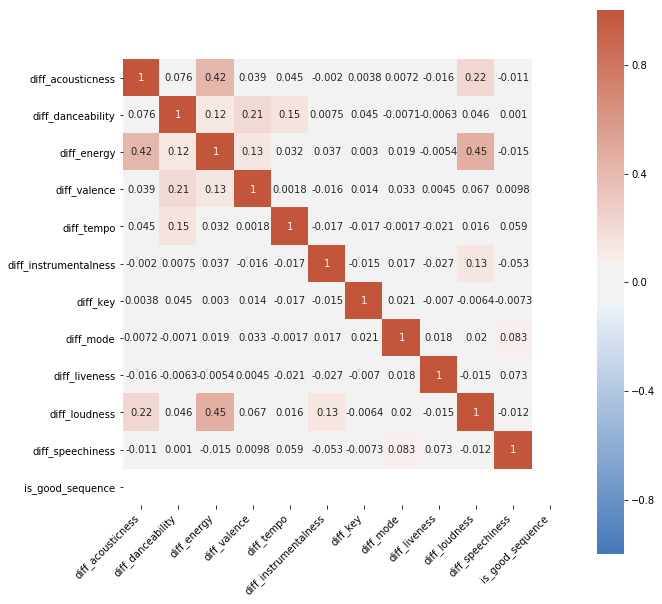

In [48]:
plt.figure(figsize=(10,10))
corr = df_diff_in_playlists.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Descriptive Statistics

In [49]:
df_diff_in_playlists.describe()

,diff_acousticness,diff_danceability,diff_energy,diff_valence,diff_tempo,diff_instrumentalness,diff_key,diff_mode,diff_liveness,diff_loudness,diff_speechiness,is_good_sequence
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.00000,2466.000000,2466.000000,2466.000000,2466.0
mean,0.239154,0.145814,0.174998,0.239929,30.725119,0.032774,4.180454,0.44485,0.109938,2.459458,0.060428,1.0
std,0.217080,0.113528,0.140371,0.175980,24.966616,0.121588,3.020599,0.49705,0.132681,2.220230,0.081097,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.001000,0.000000,1.0
25%,0.060000,0.058000,0.065000,0.096000,10.890000,0.000000,2.000000,0.00000,0.022450,0.868500,0.009200,1.0
50%,0.174000,0.120000,0.143000,0.207000,24.579000,0.000026,4.000000,0.00000,0.056950,1.842500,0.026700,1.0
75%,0.363300,0.207750,0.251000,0.349000,44.959500,0.001250,6.000000,1.00000,0.152825,3.353250,0.075725,1.0
max,0.976900,0.661000,0.867500,0.908000,138.903000,0.918000,11.000000,1.00000,0.869000,15.459000,0.485500,1.0


In [50]:
df_diff_in_playlists[['diff_energy','diff_valence','diff_tempo']].describe()

,diff_energy,diff_valence,diff_tempo
count,2466.000000,2466.000000,2466.000000
mean,0.174998,0.239929,30.725119
std,0.140371,0.175980,24.966616
min,0.000000,0.000000,0.000000
25%,0.065000,0.096000,10.890000
50%,0.143000,0.207000,24.579000
75%,0.251000,0.349000,44.959500
max,0.867500,0.908000,138.903000


### Percentailes

In [51]:
percentailes = [idx for idx in frange(0.0,1,0.05)]

In [52]:
df_percentailes = df_diff_in_playlists[['diff_energy','diff_valence','diff_tempo']].quantile(percentailes, axis = 0)
df_percentailes

,diff_energy,diff_valence,diff_tempo
0.00,0.00000,0.000000,0.00000
0.05,0.01325,0.019000,1.94700
0.10,0.02500,0.041000,3.99950
0.15,0.03800,0.059000,6.00125
0.20,0.05100,0.079000,8.44700
0.25,0.06500,0.096000,10.89000
0.30,0.07900,0.117000,13.42400
0.35,0.09400,0.140000,15.92250
0.40,0.11100,0.161000,18.43000
0.45,0.12600,0.184000,21.86450


### Boxplots Energy, Valence, and Tempo

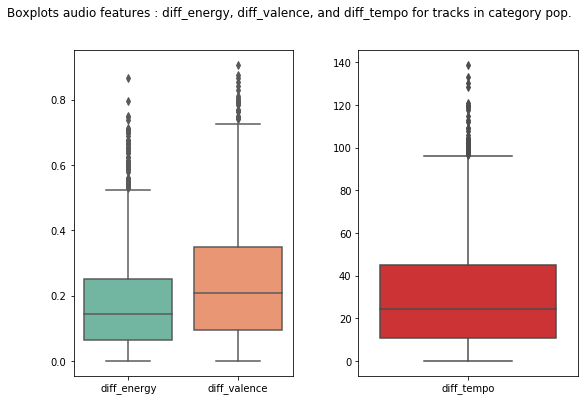

In [53]:
fig, axs = plt.subplots(1, 2, figsize = (10,6))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)

fig.suptitle("Boxplots audio features : diff_energy, diff_valence, and diff_tempo for tracks in category pop.")
    
sns.boxplot(data=df_diff_in_playlists[['diff_energy', 'diff_valence']], orient="v", palette="Set2",ax = axs[0])    
sns.boxplot(data=df_diff_in_playlists[['diff_tempo']], orient="v", palette="Set1", ax = axs[1])    

### Outliers

In [54]:
from scipy.stats import iqr

iqr_energy = iqr(df_diff_in_playlists['diff_energy'], axis=0)

out_energy_tracks_diff_in_playlists = df_diff_in_playlists['diff_energy'].describe()['75%']+1.5*iqr_energy
print("diff_energy: outliers above", out_energy_tracks_diff_in_playlists)

iqr_valence = iqr(df_diff_in_playlists['diff_valence'], axis=0)

out_valence_tracks_diff_in_playlists = df_diff_in_playlists['diff_valence'].describe()['75%']+1.5*iqr_valence
print("diff_valence: outliers above", out_valence_tracks_diff_in_playlists)

iqr_tempo = iqr(df_diff_in_playlists['diff_tempo'], axis=0)
out_tempo_tracks_diff_in_playlists = df_diff_in_playlists['diff_tempo'].describe()['75%']+1.5*iqr_tempo
print("diff_tempo: outliers above", out_tempo_tracks_diff_in_playlists)

diff_energy: outliers above 0.5299999999999998
diff_valence: outliers above 0.7284999999999999
diff_tempo: outliers above 96.06375000000003


### Density Plots Energy, Valence, and Tempo

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


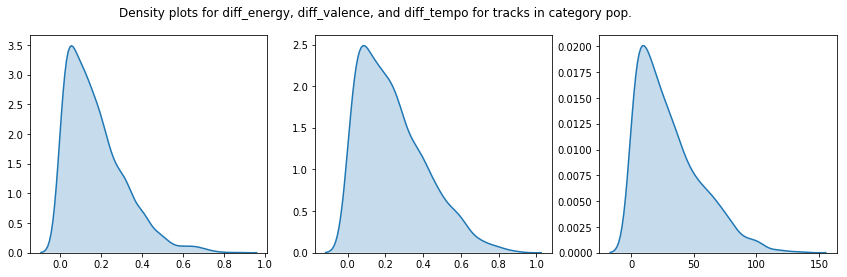

In [55]:
fig, axs = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.4)

# title   
fig.suptitle("Density plots for diff_energy, diff_valence, and diff_tempo for tracks in category pop.")

sns.kdeplot(df_diff_in_playlists['diff_energy'],shade=True,legend=False,ax=axs[0])
    
sns.kdeplot(df_diff_in_playlists['diff_valence'],shade=True,legend=False,ax=axs[1])

sns.kdeplot(df_diff_in_playlists['diff_tempo'],shade=True,legend=False,ax=axs[2])
    

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


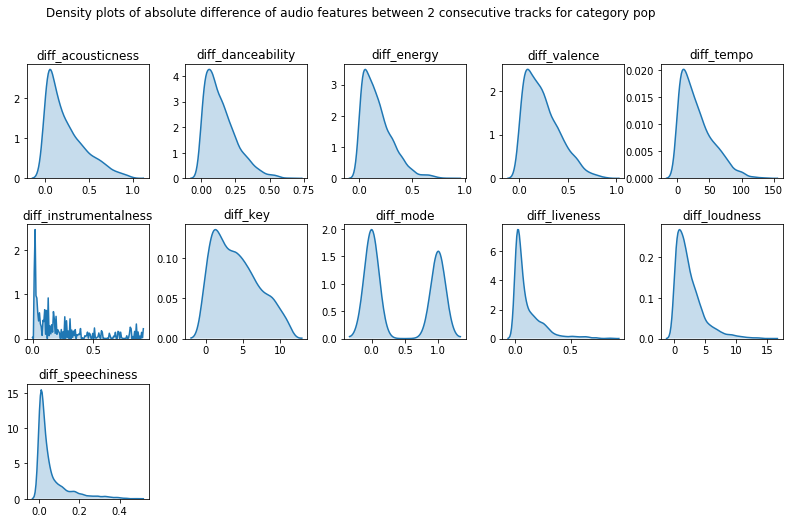

In [56]:
category_id = category
category_id_df = df_diff_in_playlists
plot_dist_categories_diff_features(category_id, category_id_df, images_folder)

### Pairplots

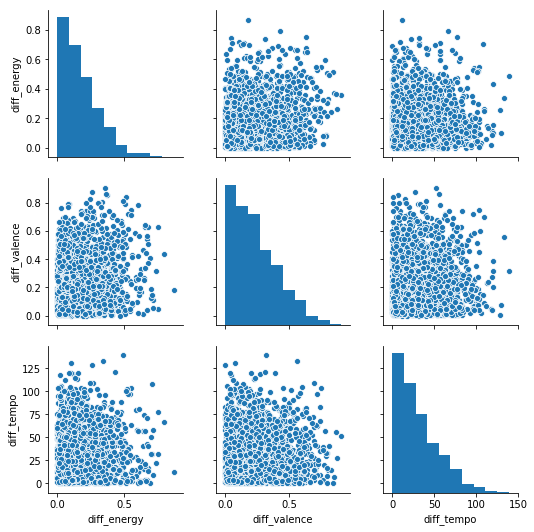

In [57]:
sns.pairplot(df_diff_in_playlists[['diff_energy','diff_valence','diff_tempo']])

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


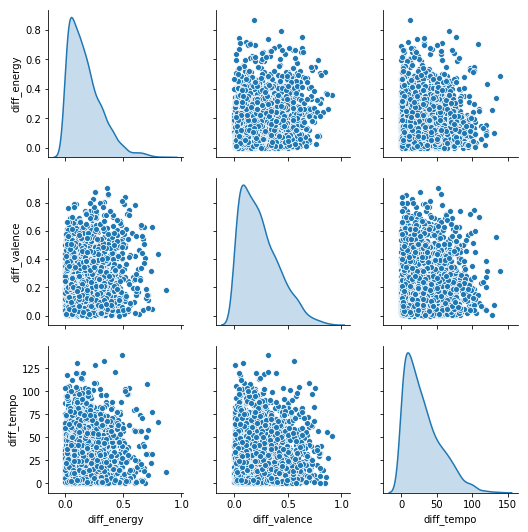

In [58]:
sns.pairplot(df_diff_in_playlists[['diff_energy','diff_valence','diff_tempo']], diag_kind='kde')

### Scatter plot Valence x Energy

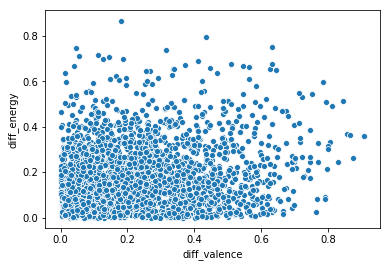

In [59]:
sns.scatterplot(df_diff_in_playlists['diff_valence'],df_diff_in_playlists['diff_energy'])